# Import the relevant libraries and packages

It is important to import the relevant libraries and pacakages to enable us perform EDA, regression analysis and to visualise the results.
The most commonly-used packages can be imported with the following lines of code.

In [1]:
import warnings
warnings.filterwarnings('ignore')
from __future__ import division
from datetime import datetime as dt

In [2]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from functools import reduce

# Modify the library and pacakges settings

Setting pandas to show a maximum of 200 rows and 20 columns of data. Also setting the colours and palettes for the seaborn graphing package

In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Colours and palettes
pred = '#e63635'
pgrey = '#3c3f41'
mgrey = '#b2b3b3'
lgrey = '#edebeb'
purp = '#ab66cc'
amet = '#8371e2'
turq = '#7ce6d8'
blue = '#55acee'
whit = '#ffffff'

# Define a colour palette
LSEpalt1 = [pred, pgrey, purp, amet]
LSEpalt2 = [pred, purp, turq, blue]

# Import, read, and check the data file

In [4]:
dat20 = pd.read_csv(r"C:\Users\USER\Downloads\XYZ.csv", error_bad_lines = False, engine='python')

In [5]:
### reading rows and columns to check correspondence with data file

print(" rows and columns in the data : ", dat20.shape)
print(" column names  : ", dat20.columns)

 rows and columns in the data :  (9849, 15)
 column names  :  Index(['Customer_id', 'Overall_Satisfaction', 'Product_Satisfaction',
       'Price_Satisfaction', 'Service_Satisfaction', 'Navigation_Satisfaction',
       'Loyalty_Satisfaction', 'Shipping_Satisfaction',
       'ProdVariety_Satisfaction', 'RevQuality_Satisfaction', 'Age', 'Visits',
       'Monetary', 'Abandonment', 'History'],
      dtype='object')


In [6]:
## Inspect dataframe info
dat20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9849 entries, 0 to 9848
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Customer_id               9849 non-null   int64
 1   Overall_Satisfaction      9849 non-null   int64
 2   Product_Satisfaction      9849 non-null   int64
 3   Price_Satisfaction        9849 non-null   int64
 4   Service_Satisfaction      9849 non-null   int64
 5   Navigation_Satisfaction   9849 non-null   int64
 6   Loyalty_Satisfaction      9849 non-null   int64
 7   Shipping_Satisfaction     9849 non-null   int64
 8   ProdVariety_Satisfaction  9849 non-null   int64
 9   RevQuality_Satisfaction   9849 non-null   int64
 10  Age                       9849 non-null   int64
 11  Visits                    9849 non-null   int64
 12  Monetary                  9849 non-null   int64
 13  Abandonment               9849 non-null   int64
 14  History                   9849 non-null 

In [7]:
# Check missing values
dat20.isna().sum()

Customer_id                 0
Overall_Satisfaction        0
Product_Satisfaction        0
Price_Satisfaction          0
Service_Satisfaction        0
Navigation_Satisfaction     0
Loyalty_Satisfaction        0
Shipping_Satisfaction       0
ProdVariety_Satisfaction    0
RevQuality_Satisfaction     0
Age                         0
Visits                      0
Monetary                    0
Abandonment                 0
History                     0
dtype: int64

In [8]:
#Checking for null values#
dat20.isnull()

,Customer_id,Overall_Satisfaction,Product_Satisfaction,Price_Satisfaction,Service_Satisfaction,Navigation_Satisfaction,Loyalty_Satisfaction,Shipping_Satisfaction,ProdVariety_Satisfaction,RevQuality_Satisfaction,Age,Visits,Monetary,Abandonment,History
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9845,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9846,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9847,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Once you are satisfied that the correct data file has been imported, you can then move on to performing some basic descriptive statistics before fitting the regression model.You can begin by calculating some descriptive statistics of the different customer satisfaction variables using the describe command. In this case, you will exclude the Customer_id and the customer descriptor variables and concentrate on the customer satisfaction scores alone.

In [9]:
dat20.loc[:, ~dat20.columns.isin(['Customer_id'])].describe()

,Overall_Satisfaction,Product_Satisfaction,Price_Satisfaction,Service_Satisfaction,Navigation_Satisfaction,Loyalty_Satisfaction,Shipping_Satisfaction,ProdVariety_Satisfaction,RevQuality_Satisfaction,Age,Visits,Monetary,Abandonment,History
count,9849.00,9849.00,9849.00,9849.00,9849.00,9849.00,9849.00,9849.00,9849.00,9849.00,9849.00,9849.00,9849.00,9849.00
mean,5.96,3.72,4.22,4.02,2.94,2.16,2.10,3.65,2.91,49.43,6.97,138.60,49.72,24.23
std,2.93,1.26,1.15,1.20,1.40,1.16,1.23,1.34,1.42,16.96,3.92,66.23,25.22,13.50
min,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,18.00,1.00,30.00,1.00,1.00
25%,4.00,3.00,4.00,3.00,2.00,1.00,1.00,3.00,2.00,36.00,4.00,79.00,31.00,12.00
50%,6.00,4.00,5.00,5.00,3.00,2.00,2.00,4.00,3.00,48.00,7.00,132.00,49.00,20.00
75%,8.00,5.00,5.00,5.00,4.00,2.00,3.00,5.00,4.00,65.00,9.00,202.00,68.00,34.00
max,10.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,81.00,26.00,240.00,100.00,54.00


While descriptive statistics(mean scores) are a good start, it can be flawed based on several factors including overinflation of survey responses from customers. Hence, the need for a regression analysis.

In [10]:
model = smf.ols(formula='Overall_Satisfaction ~ Product_Satisfaction+Price_Satisfaction+Service_Satisfaction+Navigation_Satisfaction+Loyalty_Satisfaction+Shipping_Satisfaction+ProdVariety_Satisfaction+RevQuality_Satisfaction', data=dat20).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Overall_Satisfaction   R-squared:                       0.687
Model:                              OLS   Adj. R-squared:                  0.687
Method:                   Least Squares   F-statistic:                     2703.
Date:                  Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                          00:50:04   Log-Likelihood:                -18842.
No. Observations:                  9849   AIC:                         3.770e+04
Df Residuals:                      9840   BIC:                         3.777e+04
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -3.8333      0.108    -35.395      0.000      -4.046      -3.621
Product_Satisfaction         1.0266      0.016     62.995      0.000       0.995       1.059
Price_Satisfaction           0.1399      0.014      9.666      0.000       0.111       0.168
Service_Satisfaction         1.1324      0.017     66.125      0.000       1.099       1.166
Navigation_Satisfaction      0.0628      0.012      5.322      0.000       0.040       0.086
Loyalty_Satisfaction         0.0936      0.014      6.524      0.000       0.065       0.122
Shipping_Satisfaction        0.0802      0.013      5.958      0.000       0.054       0.107
ProdVariety_Satisfaction     0.0614      0.012      4.978      0.000       0.037       0.086
RevQuality_Satisfaction      0.0171      0.012      1.475      0.140      -0.006       0.040
==============================================================================
Omnibus:                      574.633   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1149.106
Skew:                           0.414   Prob(JB):                    2.98e-250
Kurtosis:                       4.455   Cond. No.                         62.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# How would you interpret the key regression parameters (R2 value, beta coefficients, and p-values) of the variables included in the final model? In your response, using at least two independent variables when analysing the beta coefficients and p-values. 

The result of the regression analysis shows the R2 value of the model for the dataset is 0.687. This shows that the model accounts for 68.7% of the dependent variable. i.e., The independent variables included in the regression model account for 68.7% variation in overall customer satisfaction. The R2 value has shown us that the model’s goodness of fit is highly suitable in how well it predicts overall customer satisfaction based on the independent satisfaction variables. The R2 value of 0.68 is considered a good fit for the regression model.
In terms of the beta coefficient, the result shows that increasing satisfaction in all independent variables is predicted to increase overall satisfaction. While increasing satisfaction in all independent variables is predicted to increase overall satisfaction, the most pronounced independent variables are service satisfaction, and product satisfaction, with beta coefficient scores of 1.1, and 1.0 beta coefficient scores respectively. i.e., a single-point increase in service satisfaction can predict a 1.1-point increase in overall satisfaction with all other variables remaining constant. Also meaning independent variables like product and service satisfaction are very important variables in driving overall satisfaction.

Additionally, independent variables like review quality satisfaction, product variety satisfaction, shipping satisfaction, price satisfaction, loyalty satisfaction, and navigation satisfaction have low beta co-efficient scores of 0.0171, 0.0614, 0.0802, 0.1399, 0.0936, and 0.0628 respectively which means they are the least important variables in driving overall satisfaction.
The p-value result shows that there is a significant relationship between the dependent and independent variables. It also shows how reliable the independent variables’ results are for the model. In this case, the independent variables are highly significant and sufficient for the model. While most of the independent variables like product satisfaction, price satisfaction, service satisfaction, navigation satisfaction, shipping satisfaction, and product variety satisfaction account for p-values 0.000 this means that the relationship is highly unlikely to have occurred by chance. However, review quality satisfaction accounted for a p-value of 0.1 doubling the 0.05 threshold. This means that the review quality satisfaction variable is therefore not significant in the model. This variable should therefore be removed as it doesn’t have a statistically significant impact on driving overall satisfaction.


# What decisions would you recommend the management team makes in response to the regression output? In your answer, consider which aspects of offering should be allocated additional resources, and where the company should disinvest or maintain their current allocation strategy.

Combining descriptive statistics and regression analysis can help the company make resource allocation decisions.Combining these two sets of analyses can uncover the following important insights about where to invest or divest resources.This can be easily visualised by plotting the variable importance (i.e. the beta coefficient) against the variable performance (i.e. the mean satisfaction score).
Plotting importance (the beta coefficient) vs performance (mean satisfaction score).

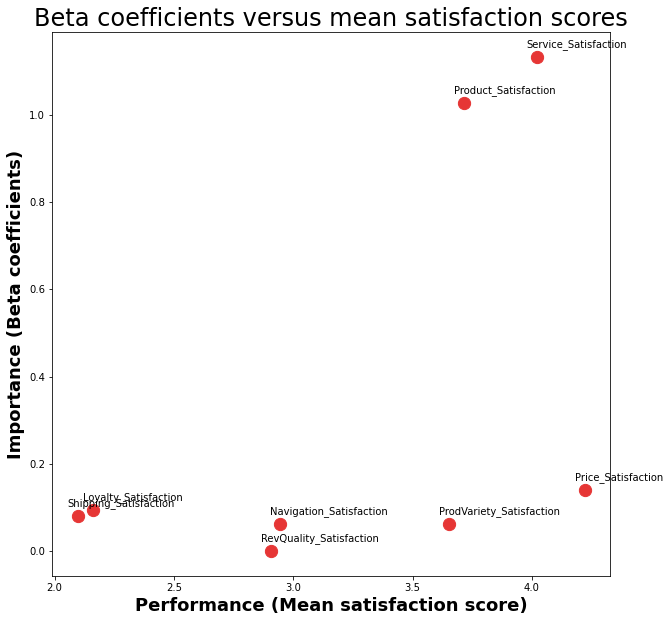

In [11]:
## First capture the model summary in a dataframe
df_summary = pd.DataFrame(model.summary2().tables[1])
df_summary = df_summary.reset_index()

# Get the relevant columns
df_summary = df_summary[df_summary.columns[0:5]]
df_summary = df_summary.drop(df_summary.columns[[2,3]], axis = 1)
df_summary.columns = ["variable", "coeff", "p_value"]
# Drop the first 2 rows
df_summary = df_summary[1:11]
# Set cofficient=0 for p_values above threshold of 0.05
p_cutoff = 0.05
df_summary["p_value"] = df_summary["p_value"].apply(lambda x: float(x))
mask = (df_summary["p_value"] > p_cutoff)
df_summary['coeff'][mask] = 0.0

## Next, calculate the means (or averages)
df_mean = dat20[list(df_summary.variable.values)]
df_mean = pd.DataFrame(df_mean.mean())
df_mean = df_mean.reset_index()
df_mean.columns = ["variable", "means"]

## Next, merge the means into the summary results 
df_summary = df_summary.merge(df_mean, left_on='variable', right_on='variable')

## Plot the beta coefficients and the means (or averages)
y = list(df_summary.coeff.values)
z = list(df_summary.means.values)
n = list(df_summary.variable.values)

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(z, y, color=pred, s=150)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]), xytext=(-10,10), textcoords='offset points', ha='left')
plt.title("Beta coefficients versus mean satisfaction scores", size=24)
plt.xlabel("Performance (Mean satisfaction score)", size=18, fontweight='bold')
plt.ylabel("Importance (Beta coefficients)", size=18, fontweight='bold')
plt.show()
plt.close()

Both service and product satisfaction are critical factors for customers, and the company excels in these areas. This indicates that there is no need for the company to alter its resource allocation strategy to improve overall customer satisfaction. Therefore, it should be maintained.  Furthermore, while the company performs well in price satisfaction and product variety satisfaction, these factors appear to be of relatively low importance to customers. As a result, it may be prudent for the company to reduce investment in these areas, as resources may be better allocated elsewhere. The company, should, therefore, disinvest in these areas.

Analysis of our performance vs importance assessment reveals that satisfaction with navigation, loyalty, shipping, and review quality are all relatively unimportant to customers, and these factors also perform poorly in terms of customer satisfaction. As such, there is no apparent need to adjust resource allocation for these areas. It is worth noting, however, that our regression analysis indicates that review quality satisfaction is not a significant driver of overall customer satisfaction, with p-values exceeding the 0.05 threshold. Given its limited impact on overall satisfaction, this further supports the recommendation to maintain company's current resource allocation strategy in this area.


# Describing any caveats or limitations that could impact the results of the regression analysis

In [12]:
## First we create an user defined snsplot function that will allow us to create
##multiple scatterplots.
def udf_snsplot(p_type, p_x, p_y, p_color, p_title, p_xlabel, p_ylabel, p_xticks, p_save=""):
    if   (p_type=="regplot"):
          v_sns_plot=sns.regplot
    elif (p_type=="scatterplot"):
          v_sns_plot=sns.scatterplot

    ax = v_sns_plot(p_x, p_y, marker="+", color=pred)
    ax.set_xticks(p_xticks)
    plt.title(p_title, size=16)
    plt.xlabel(p_xlabel, size=14, fontweight='bold')
    plt.ylabel(p_ylabel, size=14, fontweight='bold')
    if  (len(p_save) > 0):
        plt.savefig(p_save)
    else:
        plt.show()
    plt.close()

First quality control check: scatter plot of fitted values vs residuals
Linear regression makes several assumptions about the data. One of these assumptions includes that the error terms centre around a mean of zero with constant variance. To ascertain whether this assumption has been violated, it is often useful to visualise a scatter plot of the fitted versus residual values. This can be achieved with the following lines of code.

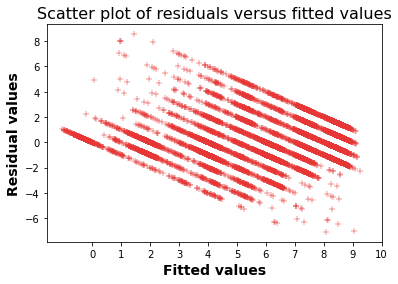

In [13]:
pred_val = model.fittedvalues.copy()
true_val = dat20['Overall_Satisfaction'].values.copy()
residual = true_val - pred_val

v_xticks = range(0,11)
v_save= ""
udf_snsplot(p_type="scatterplot", p_x=pred_val, p_y=residual, p_color=pred, p_title="Scatter plot of residuals versus fitted values", p_xlabel="Fitted values", p_ylabel="Residual values", p_xticks=v_xticks, p_save=v_save)

Second quality control check: bivariate plots of important vs unimportant variables
As a second quality control check, you can create bivariate regression plots, analysing the best- and worst-fitting variables, to confirm whether the plots capture the implicit interpretation of the beta coefficients.

It is important to note that this quality check is often more useful for regression models that include continous variables, since this also allows you to observe whether the data points fit closely around the prediction (or regression) line. Given that the majority of data set involves a large number of respondents scattered over a limited number of discrete response categories, do you expect to be able to observe a good fit?

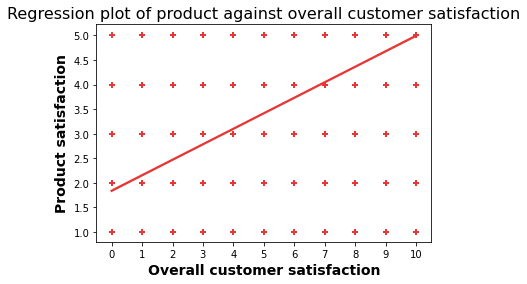

In [14]:
v_xticks = range(0,11)
v_save= ""    
udf_snsplot(p_type="regplot", p_x=dat20.Overall_Satisfaction, p_y=dat20.Product_Satisfaction, p_color=pred, p_title="Regression plot of product against overall customer satisfaction", p_xlabel="Overall customer satisfaction", p_ylabel="Product satisfaction", p_xticks=v_xticks, p_save=v_save)

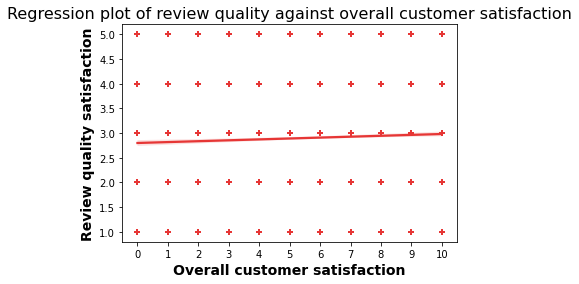

In [15]:
v_xticks = range(0,11)
v_save= ""    
udf_snsplot(p_type="regplot", p_x=dat20.Overall_Satisfaction, p_y=dat20.RevQuality_Satisfaction, p_color=pred, p_title="Regression plot of review quality against overall customer satisfaction", p_xlabel="Overall customer satisfaction", p_ylabel="Review quality satisfaction", p_xticks=v_xticks, p_save=v_save)

# What can you deduce from these plots?

When performing regression analysis, two important assumptions are homoscedasticity and normality. Homoscedasticity means that the residuals should have consistent variability and be randomly scattered around zero for all values of the independent variable. Normality assumes that the data should follow a symmetrical, bell-shaped distribution with few or no outliers. If these assumptions are violated, it can affect the accuracy and reliability of the regression model. A negative trend and non-random scatter of residuals shown in our scatterplot suggest a violation of these assumptions. These are due to the responses in our survey having discrete values ranging from 0-10 for over from overall customer satisfaction and 1-5 for individual satisfaction variables rather than continuous variables in the analysis. Discrete variables may oversimplify the relationships between variables, this has been shown by non-random patterns in the residuals. However, the OLS regression technique we have used is suitable to handle discrete variables. Others are the assumptions of that there is no multicollinearity and autocorrelation (the independent variables do not affect each other). And, that the data is normally distributed (the data is centred around the mean value, with a bell curve distribution).